# Investigacion Corta 2

Cargamos las bibliotecas que se utilizaran

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

### Algoritmo KNeighbors

Cargamos las bibliotecas necesarias para este algoritmo

In [41]:
from sklearn.neighbors import KNeighborsClassifier

Ahora se cargan los datos que se van a utilizar.
Para este caso se eligio un set de datos de clasificacion llamdo wine.

In [42]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

Se procede a verificar el valor de las clases.

In [43]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

Se procede a inicializar las listas para realizar la curva de "Accuracy vs k"

In [44]:
training_accuracy = []
test_accuracy = []

Se grafica la curva para la seleccion del valor a k mas optimo para usar.

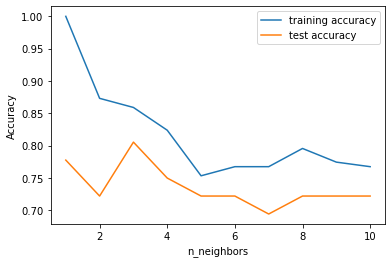

In [45]:


neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Se puede observar que si elegimos un valor de k = 3 obtendremos una buena exactitud en el entrenamiento y en la prueba. 
Haciendo la prueba con el valor de k = 3 se obtiene:

In [46]:
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, y_train)
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 0.7676056338028169
Exactitud de set de prueba: 0.7222222222222222


### Algoritmo DT

Cargamos la  biblioteca que contiene el algoritmo

In [47]:
from sklearn import tree
import graphviz

Cargamos el set de datos a utlizar

In [48]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

Procedemos a realizar el aprendizaje supervisado

In [49]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Graficamos el arbol para ver su distribucion

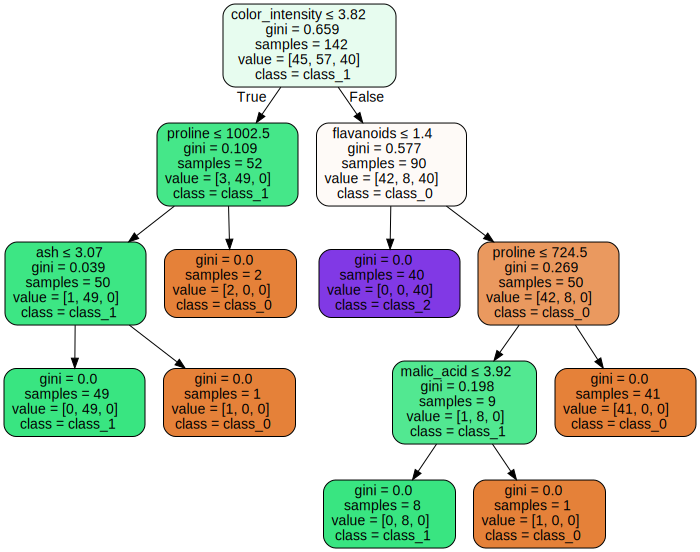

In [50]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=data.feature_names,
                                class_names=data.target_names,
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Por ultimo vemos como se comporta el entrenamiento en terminos de la precision

In [51]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 1.0
Exactitud de set de prueba: 0.9444444444444444


### Algoritmo AdaBoost

Cargamos las biblioyecas necesarias

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

Cargamos los datos

In [53]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

Y procedemos a efectuar la curva de numero de estimadores vs exactitud para elegir un numero de estimadores que optimice el aprendizaje

In [54]:
training_accuracy = []
test_accuracy = []

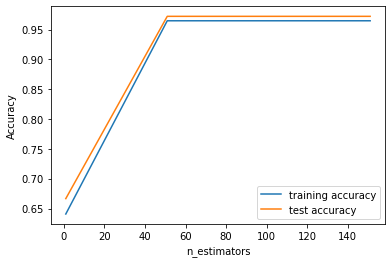

In [55]:
n_estimators = range(1, 200, 50)
for n in n_estimators:
    # se construye el modelo de clasificacion
    clf = AdaBoostClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(n_estimators, training_accuracy, label="training accuracy")
plt.plot(n_estimators, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

Como se puede observar en la grafica a parti de los 55 estimadores, la exactitud del modelo se mantiene constante, por lo que por seguridad utilizaremos 60 estimadores para este modelo.

In [56]:
clf = AdaBoostClassifier(n_estimators=60)
clf = clf.fit(X_train, y_train)

Por utlimo realizamos observamos la exactitud del algoritmo

In [57]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 0.9225352112676056
Exactitud de set de prueba: 0.9166666666666666


### Algoritmo GPC

Cargamos las bibliotecas necesarias

In [58]:
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

Y cargamos los datos

In [59]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

En este algoritmo se basa en la aproximacion de Laplace.

In [60]:
kernel = 1.0 * RBF(1.0)
clf = GaussianProcessClassifier(kernel=kernel, random_state=0)
clf = clf.fit(X_train, y_train)

Y la exactitud que se alcanza con este algoritmo es de

In [61]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 0.9647887323943662
Exactitud de set de prueba: 1.0


### Algoritmo Bagging Classifier

Cargamos las bibliotecas necesarias

In [62]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

Cargamos los datos

In [63]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

Dado que este algoritmo depende de la cantidad de estimadores, realizamos una curva de comparacion para determinar la cantida de estimadores que nos genera un error menor.

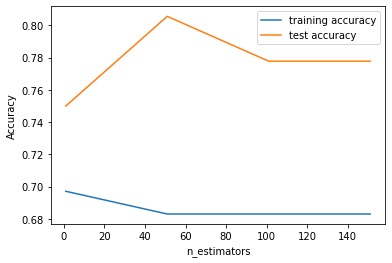

In [64]:
training_accuracy = []
test_accuracy = []

n_estimators = range(1, 200, 50)
for n in n_estimators:
    # se construye el modelo de clasificacion
    clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=n, random_state=0)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(n_estimators, training_accuracy, label="training accuracy")
plt.plot(n_estimators, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

Como se puede notar en la grafica, podemos utilizar una cantidad de estimadores cercana a 50 y con esto obtener una exactitud mayor al 80% en el test de datos, sin embargo, se sacrifica la exactitud en el set de entrenamiento.

In [65]:
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=50, random_state=0)
clf = clf.fit(X_train, y_train)

Este algortimo tiene una precision de

In [66]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 0.6830985915492958
Exactitud de set de prueba: 0.8055555555555556


Dado que ambas exactitudes estan muy bajas se procede a aumentar el numero de estimadores, para tratar de mejorar el sistema

In [67]:
clf = BaggingClassifier(base_estimator=SVC(),
                        n_estimators=100, random_state=0)
clf = clf.fit(X_train, y_train)

Y con este nuevo aprendizaje obtenemos los siguientes errors

In [68]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 0.6830985915492958
Exactitud de set de prueba: 0.7777777777777778


Se puede notar que aumento un aproximadamente 2,7% en el set de prueba, sin embargo, empeoro en el set de entrenamiento aproximadamente 1% y aun asi los porcentajes obtenidos estan muy por debajo de los obtenidos con los otros algoritmos. Por esta razon este algoritmo no es recomendable para este set de datos.

### Algoritmo Gradient Boosting Classifier

Cargamos las bibliotecas necesarias

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

Cargamos los datos que vamos a utilizar

In [70]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

Al igual que los casos anteriores, dado que este modelo depende de la cantidad de estimadores que queremos usar, se procede a realizar la curva de comparacion.

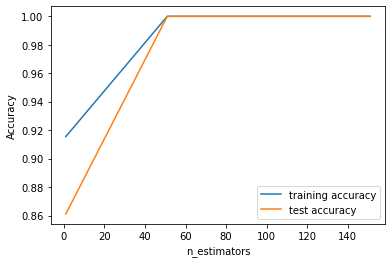

In [71]:
training_accuracy = []
test_accuracy = []

n_estimators = range(1, 200, 50)
for n in n_estimators:
    # se construye el modelo de clasificacion
    clf = GradientBoostingClassifier(n_estimators=n, learning_rate=1.0, 
                                 max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(n_estimators, training_accuracy, label="training accuracy")
plt.plot(n_estimators, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend()

Y similar al caso del Ada Boost, este modelo, alcanza su valor maximo de exactitud aproximadamente con 55 estimadores, por lo que para determinar el valor exacto de de la exactitud se utilizara 60 por seguridad.

In [72]:
clf = GradientBoostingClassifier(n_estimators=60,learning_rate=1.0, 
                                 max_depth=1, random_state=0)
clf = clf.fit(X_train, y_train)

Procedemos a verificar la exactitud del modelo con respecto al set de prueba y el set de entrenamiento

In [73]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 1.0
Exactitud de set de prueba: 1.0


Adicionalmente se puede hacer variar la tasa de aprendizaje para observar que efecto tiene en la exactitud del algortimo con este set de datos.

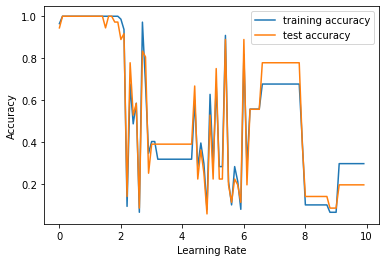

In [74]:
training_accuracy = []
test_accuracy = []

lr = np.arange(0.01, 10, 0.1)
for n in lr:
    # se construye el modelo de clasificacion
    clf = GradientBoostingClassifier(n_estimators=60, learning_rate=n, 
                                 max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(lr, training_accuracy, label="training accuracy")
plt.plot(lr, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Learning Rate")
plt.legend()

En la figura anterior se puede notar que la tasa de aprendizaje que nos permite alcanzar un 100% de exactitud, con 60 estimadores es efectivamente 1.
Con este algoritmo, obtuvimos un aprendizaje perfecto, por lo que es muy efectivo para este set de datos.

### Algoritmo Logostic Regression

La biblitecas necesarias son

In [75]:
from sklearn.linear_model import LogisticRegression

Cargamos los datos de entrenamiento y testeo

In [76]:
data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

Procedemos a realizar la regresion logistica, en este caso se tuvo que configurar la cantidad maxima de iteraciones a 3000, ya que con el default (100) y con valores menores a este el algoritmo no converge y a la hora de su implementacion da un error.

In [77]:
clf = LogisticRegression(random_state=0, max_iter=3000)
clf = clf.fit(X_train, y_train)

Y verificamos los valores de exactitud obtenidos con este algoritmo

In [78]:
print("Exactitud de set de entrenamiento:", clf.score(X_train, y_train))
print("Exactitud de set de prueba:", clf.score(X_test, y_test))

Exactitud de set de entrenamiento: 0.9929577464788732
Exactitud de set de prueba: 1.0


Se puede notar que este algoritmo es sumamente efectivo para la clasificacion, tanto del set de entrenamiento, como del set de prueba.

## Conclusiones

En este notebook se realizaron 7 algoritmos de aprendizaje supervisado, para la clasificacion de un set de datos en donde se tienen tres posibles vinos y despendiendo de sus features se puede identificar cual vino es.
A continuacion se muestra la lista de los algoritmos ordenado desde los que tuvieron mejor exactitud promedio ((Test_accuracy+Train_accuracy)/2)
* Gradient Booster Classifier (1)
* Logistic Regression (0.9964)
* GPC (0.9824)
* Decision Tree (0.9722)
* Ada Boost (0.9196)
* KNeighbors (0.7449)
* Bagging Classifier (0.7443)